# Assignment05
# Name : Jun-ha Lee
# Student ID : 2017220159
# Github : https://github.com/myosoo/Assignment05.git

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io, color
from skimage import exposure
import sys

### Load cau.jpg image file.
### Display the cau.jpg image as color image, gray image, and ID kernel image.
$Identity kernel =
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
  \end{bmatrix}$

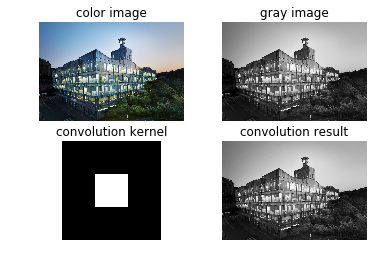

In [2]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

ker = np.array([[0,0,0],[0,1,0],[0,0,0]]) 
im_conv = signal.convolve2d(im_gray, ker, boundary='symm', mode='same') 

p1 = plt.subplot(2,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('convolution kernel')
plt.imshow(ker, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('convolution result')
plt.imshow(im_conv, cmap='gray')
plt.axis('off')

plt.show()

### Derivative in x-direction and y-direction. 
### Define convolution kernel for derivative x :
$\frac{\partial f(x, y)}{\partial x} = f(x, y+1) - f(x, y) \Rightarrow  
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & -1 & 1 \\
    0 & 0 & 0
  \end{bmatrix}$
### Define convolution kernel for derivative y :
$\frac{\partial f(x, y)}{\partial y} = f(x+1, y) - f(x, y) \Rightarrow
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & -1 & 0 \\
    0 & 1 & 0
  \end{bmatrix}$

In [3]:
def compute_the_derivative_in_x_direction(im_gray):
    derivative_x = np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]])
    return signal.convolve2d(im_gray, derivative_x, boundary = 'symm', mode = 'same')

def compute_the_derivative_in_y_direction(im_gray):
    derivative_y = np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]])
    return signal.convolve2d(im_gray, derivative_y, boundary = 'symm', mode = 'same')

### Compute the derivative.

In [4]:
fx = compute_the_derivative_in_x_direction(im_gray)
fy = compute_the_derivative_in_y_direction(im_gray)

### Displays the computed image.

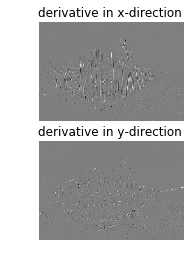

In [5]:
p1 = plt.subplot(2,1,1)
p1.set_title('derivative in x-direction ')
plt.imshow(fx, cmap = 'gray')
plt.axis('off')

p2 = plt.subplot(2,1,2)
p2.set_title('derivative in y-direction ')
plt.imshow(fy, cmap = 'gray')
plt.axis('off')

plt.show()

### Define function for computing the magnitude of the gradient :
$Function = \sqrt[]{(\frac{\partial f(x, y)}{\partial x})^2 + (\frac{\partial f(x, y)}{\partial y})^2}$

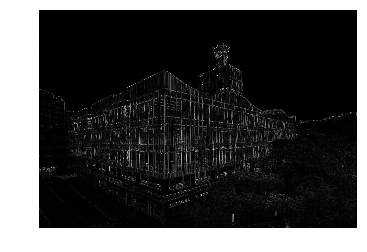

In [6]:
def absolute_value_of_gradient(grad_vector):
    return np.sqrt(np.sum(np.power(grad_vector, 2), axis = 0))

grad_vector = [fx, fy]
magnitude_grad_vector = absolute_value_of_gradient(grad_vector)

plt.imshow(magnitude_grad_vector, cmap = 'gray')
plt.axis('off')

plt.show()

### Compute direction of gradient.
$\theta =$$\arctan$$ \frac{\partial f(x, y)}{\partial y} \over \frac{\partial f(x, y)}{\partial x}$

/home01/users/junha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home01/users/junha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home01/users/junha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arctan
  


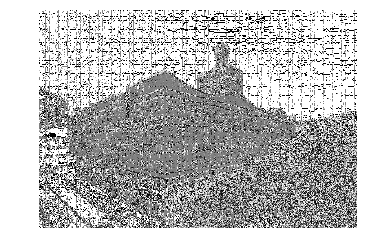

In [7]:
def compute_the_direction_of_the_gradient(grad_vector):
    return np.arctan(np.divide(grad_vector[1], grad_vector[0]))

grad_direction = compute_the_direction_of_the_gradient(grad_vector)

plt.imshow(grad_direction, cmap = 'gray')
plt.axis('off')

plt.show()

### Result image with smoothing kernel.

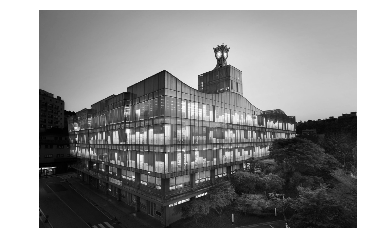

In [8]:
def image_smoothing(im_gray):
    smoothing_kernel = 1/9 * np.array([[1,1,1],[1,1,1],[1,1,1]])
    return signal.convolve2d(im_gray, smoothing_kernel, boundary = 'symm', mode = 'same')

im_smoothing = image_smoothing(im_gray)

plt.imshow(im_smoothing, cmap = 'gray')
plt.axis('off')

plt.show()

### Result image with USM(unsharp masking)
##### 1. Take image, let's call it I
##### 2. Create a blurred version of it using Gaussian Blur. Let's call it B
##### 3. Let's create mask M by M = I - B
##### 4 And create unsharp mask UM by UM = I + M
##### 5. This unsharp mask will increase the perceived sharpness of an image by increasing the contrast of pixels next to each other. It does so by making darker pixels a bit darker, and brighter pixels a bit brighter.
### Own kernel result

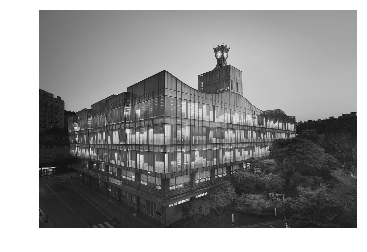

In [9]:
def image_own_kernel(im_gray):
    unsharp_masking = -1/256 * np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,-476,24,6],[4,16,24,16,4],[1,4,6,4,1]])
    return signal.convolve2d(im_smoothing, unsharp_masking, boundary = 'symm', mode = 'same')

own_result = image_own_kernel(im_smoothing)

plt.imshow(own_result, cmap = 'gray')
plt.axis('off')

plt.show()